In [4]:
# Import pandas 
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the customer_data
customer_data = pd.read_csv('datasets/Customer_dataset.csv',
                            parse_dates=True,
                            infer_datetime_format=True)

# Load the app_purchases
app_purchases = pd.read_csv('datasets/inapp_purchases_dataset.csv',
                            parse_dates=True,
                            infer_datetime_format=True)
# Load the daily_revenue
daily_revenue = pd.read_csv('datasets/Daily_revenue_dataset.csv')

# Load  the user_purchases 
user_purchases = pd.read_csv('datasets/User_demographics_paywal_dataset.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

# Print the columns of customer data
print(daily_revenue.columns)

# Print the columns of app_purchases
print(user_purchases.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')
Index(['index', 'gender', 'device', 'revenue', 'date', 'country'], dtype='object')
Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')


### Grouping datasets:

In [10]:
# Changing reg_date column type from string to datetime:
customer_data["reg_date"] = pd.to_datetime(customer_data["reg_date"])  

In [11]:
# Adding new colum as reg_date_1 which is changed type from timestapt to datetime(Y-M-D):
customer_data['reg_date_1'] = customer_data['reg_date'].dt.strftime('%Y-%m-%d')

In [12]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, left_on=['uid','date'],right_on=['uid','reg_date_1'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date       uid             sku  price                  reg_date  \
0  2016-03-30  94055095    sku_four_599    599 2016-03-30 00:00:00+00:00   
1  2015-10-28  69627745     sku_one_199    199 2015-10-28 00:00:00+00:00   
2  2017-02-02  11604973  sku_seven_1499    499 2017-02-02 00:00:00+00:00   
3  2016-06-05  22495315    sku_four_599    599 2016-06-05 00:00:00+00:00   
4  2018-02-17  51365662     sku_two_299    299 2018-02-17 00:00:00+00:00   

  device gender country  age  reg_date_1  
0    iOS      F     BRA   16  2016-03-30  
1    and      F     BRA   18  2015-10-28  
2    and      F     USA   16  2017-02-02  
3    and      F     USA   19  2016-06-05  
4    iOS      M     TUR   16  2018-02-17  
35


### Parsing dates
In this exercise you will practice parsing dates in Python. While often data pulled from a database will be correctly formatted, other data sources can be less nice. Knowing how to properly parse dates is crucial to get the data in a workable format. For reference refer to https://strftime.org/ throughout this exercise to see date format to use.

In [13]:
# Provide the correct format for the date: 2016 March 01 01:56
date_data_four = "2016 March 01 01:56"
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

2016-03-01 01:56:00


In [14]:
# Provide the correct format for the date: Saturday January 27, 2017
date_data_one = "Saturday January 27, 2017"
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

2017-01-27 00:00:00


### Plotting time series data
In trying to boost purchases, we have made some changes to our introductory in-app purchase pricing. In this exercise, you will check if this is having an impact on the number of purchases made by purchasing users during their first week.

The dataset user_purchases has been joined to the demographics data and properly filtered. The column 'first_week_purchases' that is 1 for a first week purchase and 0 otherwise has been added. This column is converted to the average number of purchases made per day by users in their first week.

We will try to view the impact of this change by looking at a graph of purchases as described in the instructions.

In [ ]:
uid_date_combined_data.head()

In [ ]:
# Group the data and aggregate first_week_purchases
uid_date_combined_data = uid_date_combined_data.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
app_purchases.columns = app_purchases.columns.droplevel(level=1)
app_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
app_purchases = app_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
app_purchases.columns = app_purchases.columns.droplevel(level=1)
app_purchases.reset_index(inplace=True)

# Plot the results
app_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

### Pivoting our data
As you saw, there does seem to be an increase in the number of purchases by purchasing users within their first week. Let's now confirm that this is not driven only by one segment of users. We'll do this by first pivoting our data by 'country' and then by 'device'. Our change is designed to impact all of these groups equally.

The user_purchases data from before has been grouped and aggregated by the 'country' and 'device' columns. These objects are available in your workspace as user_purchases_country and user_purchases_device.

As a reminder, .pivot_table() has the following signature:

pd.pivot_table(data, values, columns, index)

In [ ]:
# Pivot the data
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

In [ ]:
# Pivot the data
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

### Examining the different cohorts
To finish this lesson, you're now going to plot by 'country' and then by 'device' and examine the results. Hopefully you will see the observed lift across all groups as designed. This would point to the change being the cause of the lift, not some other event impacting the purchase rate.

In [ ]:
# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

In [ ]:
# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

### Seasonality and moving averages
Stepping back, we will now look at the overall revenue data for our meditation app. We saw strong purchase growth in one of our products, and now we want to see if that is leading to a corresponding rise in revenue. As you may expect, revenue is very seasonal, so we want to correct for that and unlock macro trends.

In this exercise, we will correct for weekly, monthly, and yearly seasonality and plot these over our raw data. This can reveal trends in a very powerful way.

The revenue data is loaded for you as daily_revenue.

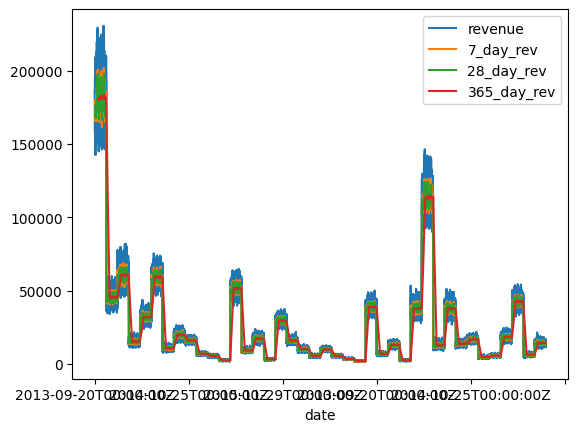

In [15]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()

# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

### Exponential rolling average & over/under smoothing
In the previous exercise, we saw that our revenue is somewhat flat over time. In this exercise we will dive deeper into the data to see if we can determine why this is the case. We will look at the revenue for a single in-app purchase product we are selling to see if this potentially reveals any trends. As this will have less data then looking at our overall revenue it will be much noisier. To account for this we will smooth the data using an exponential rolling average.

A new daily_revenue dataset has been provided for us, containing the revenue for this product.



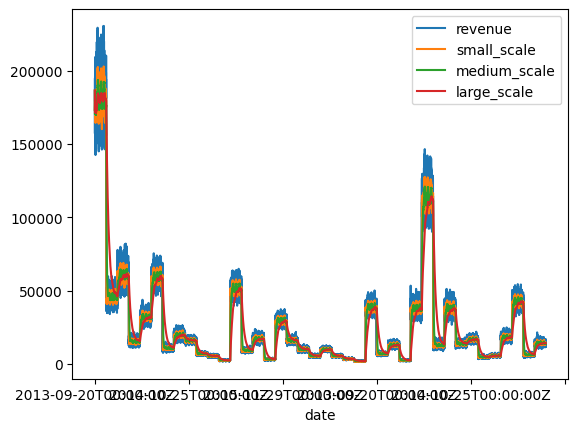

In [16]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

### Visualizing user spending
Recently, the Product team made some big changes to both the Android & iOS apps. They do not have any direct concerns about the impact of these changes, but want you to monitor the data to make sure that the changes don't hurt company revenue. Additionally, the product team believes that some of these changes may impact female users more than male users.

In this exercise you're going to plot the monthly revenue for one of the updated products and evaluate the results.

The dataset user_revenue containing the 'device', 'gender', 'country', 'date', and 'revenue' has been loaded. It has been grouped by month, device, and gender. Note that here, a 'month' column has been extracted from the 'date' column.

In [17]:
daily_revenue["date"] = pd.to_datetime(daily_revenue["date"])

In [18]:
# Creating a column as month that extracted from date column.
daily_revenue["month"] = daily_revenue["date"].dt.month 

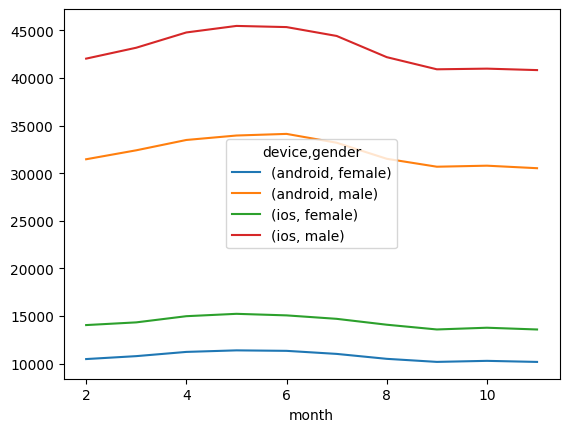

In [19]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(daily_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()